In [1]:
import numpy as np
import pylab as plb

In [2]:
point_list = [(0,1), (1,6), (5,6), (5,4), (1,2), (2,3), (2,7)]

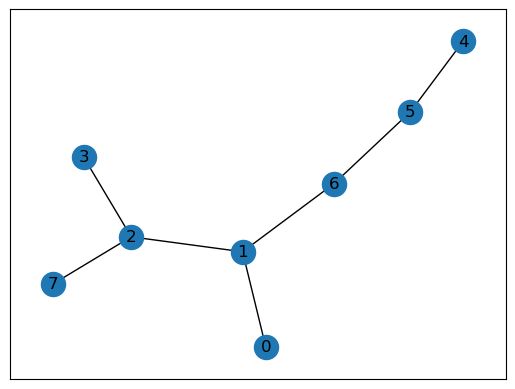

In [3]:
goal = 7
import networkx as nx
G = nx.Graph()
G.add_edges_from(point_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plb.show()

In [4]:
MATRIX_SIZE = 8
R = np.matrix(np.ones(shape = (MATRIX_SIZE, MATRIX_SIZE)))
print(R)
R *= 1
print(R)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [5]:
for point in point_list:
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0
    if point[0] == goal:
        R[point[::-1]] = 1

R[goal, goal] = 100
R

matrix([[  1.,   0.,   1.,   1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   0.,   1.,   1.,   1.,   0.,   1.],
        [  1.,   1.,   1.,   0.,   1.,   1.,   1., 100.],
        [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   0.,   1.,   0.,   1.],
        [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.,   1.,   1., 100.]])

In [27]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gamma = 0.8
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >- 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return (np.sum(Q/np.max(Q)*100))
    else:
        return (0)
        
update(initial_state, action, gamma)

max_value 1.0


/var/folders/06/vh_n987x4mg92zyb0vgx11sw0000gn/T/ipykernel_14759/2058409970.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act, 1))
/var/folders/06/vh_n987x4mg92zyb0vgx11sw0000gn/T/ipykernel_14759/2058409970.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


100.0

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

/var/folders/06/vh_n987x4mg92zyb0vgx11sw0000gn/T/ipykernel_14759/2058409970.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act, 1))
/var/folders/06/vh_n987x4mg92zyb0vgx11sw0000gn/T/ipykernel_14759/2058409970.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = i

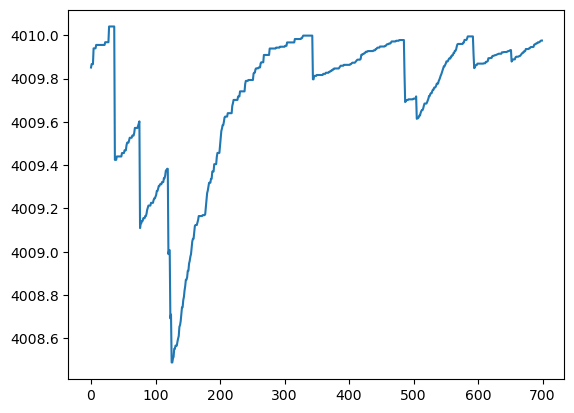

In [37]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update (current_state, action, gamma)
    scores.append(score)
    print('Score: ', str(scores))

print('rained Q Matrix: ')
print(Q/np.max(Q)*100)
current_state = 0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
    
print("Most Efficient Path: ")
print(steps)
plb.plot(scores)
plb.show()